In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

In [8]:
data = pd.read_csv('movie_interest_dataset.csv')

In [9]:
label_encoder = LabelEncoder()
data['Interest Level'] = label_encoder.fit_transform(data['Interest Level'])


In [10]:
categorical_cols = ['Genre']
numerical_cols = [col for col in data.columns if col != 'Interest Level']

In [11]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = encoder.fit_transform(data[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_cols, index=data.index)



In [12]:
X_final = pd.concat([X_encoded_df, data[numerical_cols]], axis=1)

In [14]:
data = pd.concat([data.drop('Genre', axis=1), X_encoded_df], axis=1)

In [15]:
y = data['Interest Level']
X = data.drop('Interest Level', axis=1)

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
scaler = StandardScaler()
data[data.columns[:-1]] = scaler.fit_transform(data[data.columns[:-1]])


In [18]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [19]:
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

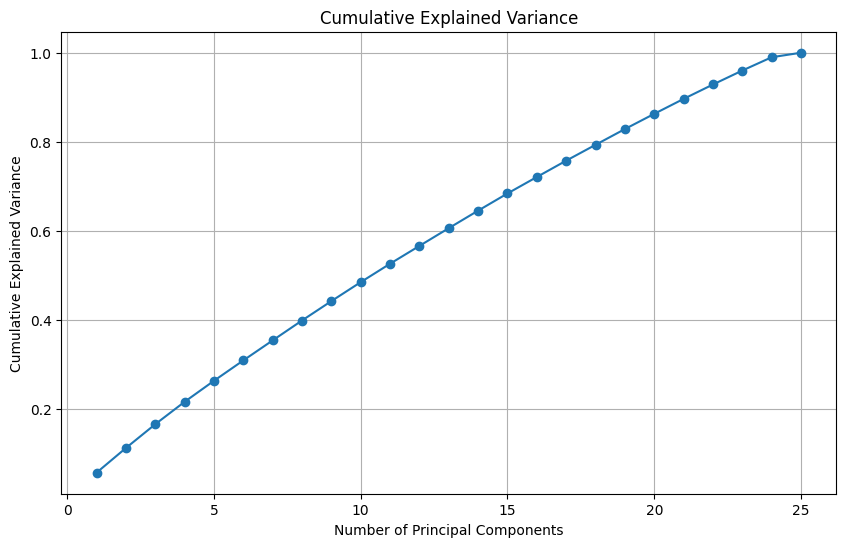

In [103]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [20]:
pca = PCA()
pca.fit(X)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)


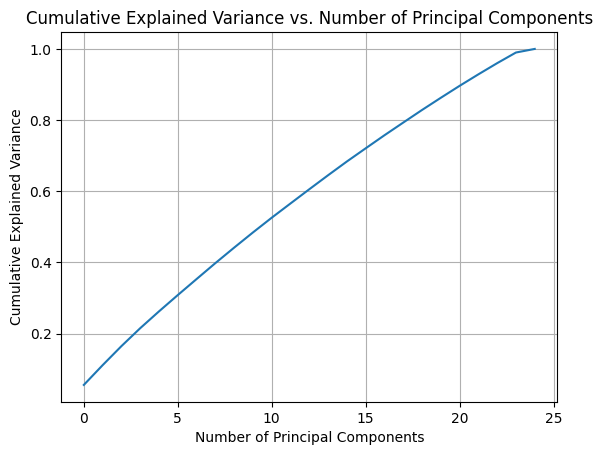

In [105]:


plt.plot(cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()


In [21]:
n_components = 10
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X)

In [22]:
explained_variance = pca.explained_variance_ratio_
components = range(1, n_components + 1)

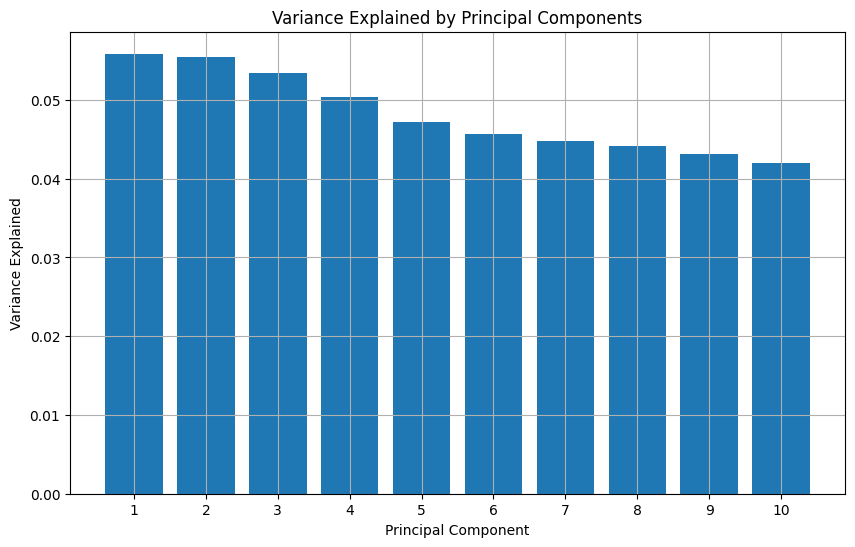

In [108]:
plt.figure(figsize=(10, 6))
plt.bar(components, explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Principal Components')
plt.xticks(components)
plt.grid(True)
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

In [24]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [25]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.6488720000000001


In [26]:

mse_values = []

In [27]:
n_components_range = range(1, X_reduced.shape[1] + 1)

cv_scores = []

In [28]:
for n_components in n_components_range:
    
    X_reduced_partial = X_reduced[:, :n_components]
    model = RandomForestRegressor()
    neg_mse_scores = cross_val_score(model, X_reduced_partial, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -neg_mse_scores
    mean_mse = mse_scores.mean()
    cv_scores.append(mean_mse)
print(mean_mse)

0.7308469999999999


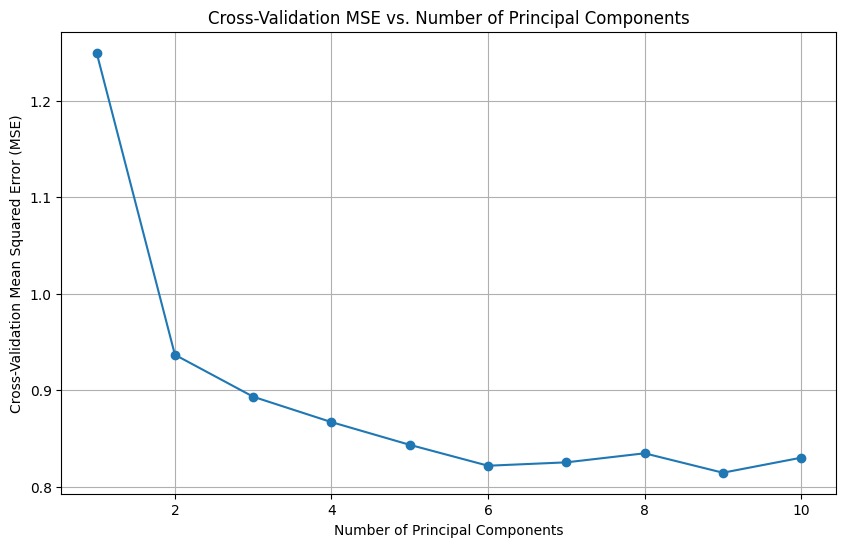

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, cv_scores, marker='o')
plt.title('Cross-Validation MSE vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cross-Validation Mean Squared Error (MSE)')
plt.grid(True)
plt.show()